In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

In [24]:
# Load the dataset
df = pd.read_excel(r"E:\koustubh\Welingkar\5th sem\Algorithms in ML\Project\Database 2Merged.xlsx")
df = df.drop('UniqueID', axis=1)


In [3]:
# Convert room type to categorical codes
label_encoder = LabelEncoder()
df['root.page.record.room_type.room_type_name'] = label_encoder.fit_transform(df['root.page.record.room_type.room_type_name'])

In [4]:
df.head()

,root.page.record.review_count,root.page.record.rating_count,root.page.record.room_type.room_type_name,root.page.record.room_type.room_type_price,root.page.record.Breakfast,Basic Bathroom Amenities,Cable / Satellite / Pay TV available,Ceiling Fan,Heating Facility (on request),Internet Connection In Room,...,Bedside Table,Dustbins,Western Toilet Seat,Hairdryer,Newspapers,Mineral Water,Coffee Table,Room Heater,Mini Refrigerator,Utensils (on request)
0,1,0.0,106,1304.0,1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,106,1077.0,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0.0,17,1379.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,17,1663.0,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,17,1077.0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# Checking null values

In [5]:
df.isnull().sum()

root.page.record.review_count                  0
root.page.record.rating_count                  0
root.page.record.room_type.room_type_name      0
root.page.record.room_type.room_type_price    19
root.page.record.Breakfast                     0
Basic Bathroom Amenities                       3
Cable / Satellite / Pay TV available           3
Ceiling Fan                                    3
Heating Facility (on request)                  3
Internet Connection In Room                    3
Telephone                                      3
Shower Facility Available                      3
Breakfast Available (surcharge)                3
Hot / Cold Running Water                       3
Housekeeping                                   3
Desk in Room                                   3
Window Opens                                   3
Hill View from all Rooms                       3
HD / LCD Satellite TV                          3
Sofa Table / Extra Seats                       3
Private Garden      

In [6]:
df.dropna(inplace=True)

In [7]:
# Check for unusual or unexpected values in all columns
for col in df.columns:
    print(col)
    print(df[col].value_counts())

root.page.record.review_count
0      224
258    105
1       65
29      39
157     28
330     28
6       26
911     26
2       24
23      23
3       22
114     20
65      20
126     16
37      15
163     14
111     13
5       12
12      12
18      12
4       12
44      12
15      11
101     11
104     11
11      11
181     10
19       9
131      8
68       8
822      8
30       7
17       7
13       7
8        7
33       6
22       6
214      6
134      6
42       6
94       6
34       5
76       5
27       5
108      4
130      4
200      4
324      4
72       4
121      3
400      3
86       3
24       3
46       2
435      2
51       2
10       2
9        2
16       1
79       1
Name: root.page.record.review_count, dtype: int64
root.page.record.rating_count
0.0    338
8.5    110
7.7     64
7.8     50
7.4     37
8.6     34
8.1     28
8.9     26
6.5     26
7.9     25
7.2     24
7.6     23
8.2     21
7.0     20
7.5     16
8.7     13
8.0     13
6.6     10
6.8     10
8.8     10
9.0      9

In [8]:
# Define expected range of values
min_value = 0
max_value = float('inf')

# Drop rows with unexpected values in all numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    df = df[(df[col] >= min_value) & (df[col] <= max_value)]

# Reset the index
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

root.page.record.review_count                 0
root.page.record.rating_count                 0
root.page.record.room_type.room_type_name     0
root.page.record.room_type.room_type_price    0
root.page.record.Breakfast                    0
Basic Bathroom Amenities                      0
Cable / Satellite / Pay TV available          0
Ceiling Fan                                   0
Heating Facility (on request)                 0
Internet Connection In Room                   0
Telephone                                     0
Shower Facility Available                     0
Breakfast Available (surcharge)               0
Hot / Cold Running Water                      0
Housekeeping                                  0
Desk in Room                                  0
Window Opens                                  0
Hill View from all Rooms                      0
HD / LCD Satellite TV                         0
Sofa Table / Extra Seats                      0
Private Garden                          

# Univariate Analysis

In [10]:
df.describe()

,root.page.record.review_count,root.page.record.rating_count,root.page.record.room_type.room_type_name,root.page.record.room_type.room_type_price,root.page.record.Breakfast,Basic Bathroom Amenities,Cable / Satellite / Pay TV available,Ceiling Fan,Heating Facility (on request),Internet Connection In Room,...,Bedside Table,Dustbins,Western Toilet Seat,Hairdryer,Newspapers,Mineral Water,Coffee Table,Room Heater,Mini Refrigerator,Utensils (on request)
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,103.057260,5.121370,67.556237,5604.172515,0.481595,0.584867,0.426380,0.455010,0.051125,0.171779,...,0.066462,0.199387,0.095092,0.097137,0.225971,0.256646,0.104294,0.032720,0.059305,0.030675
std,179.425327,3.788579,43.953467,6124.245334,0.499917,0.492997,0.494803,0.498227,0.220365,0.377381,...,0.249216,0.399744,0.293492,0.296296,0.418434,0.437006,0.305799,0.177993,0.236315,0.172523
min,0.000000,0.000000,0.000000,264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,24.000000,1782.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,7.400000,65.000000,3234.995000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,131.000000,8.100000,108.000000,6537.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,911.000000,9.800000,145.000000,49276.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


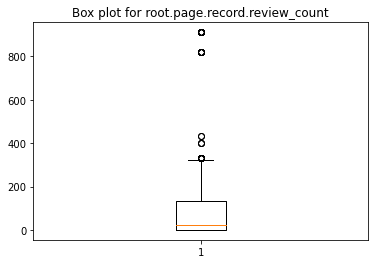

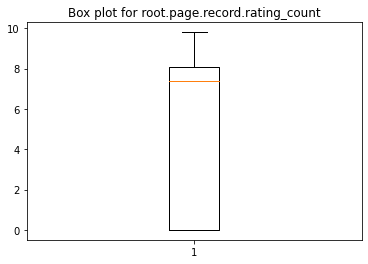

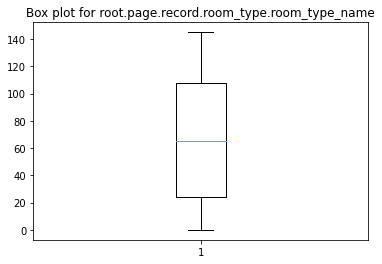

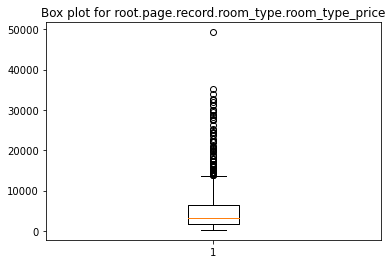

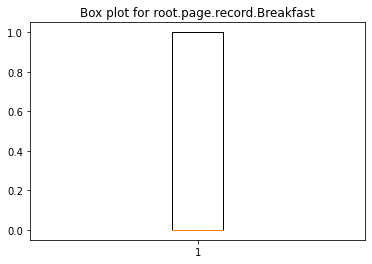

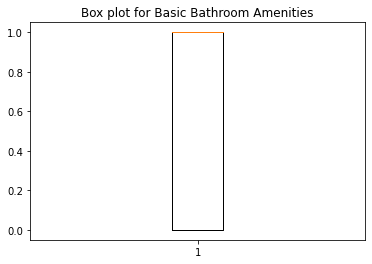

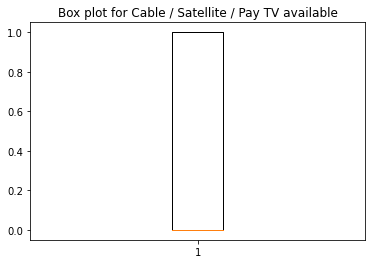

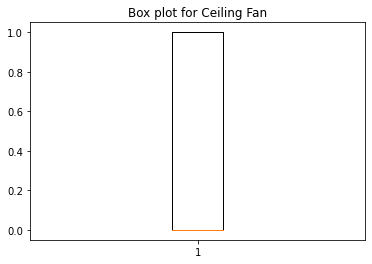

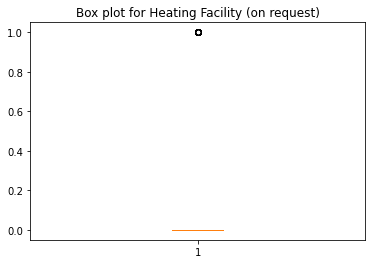

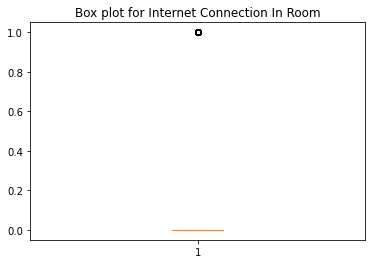

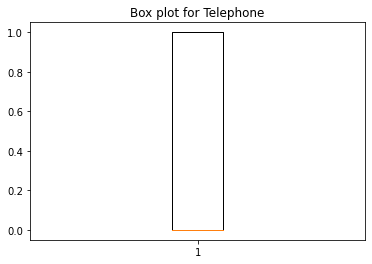

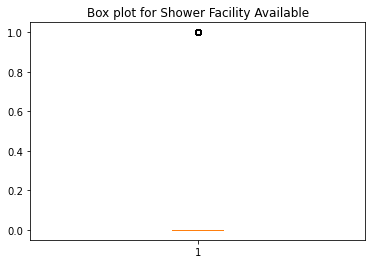

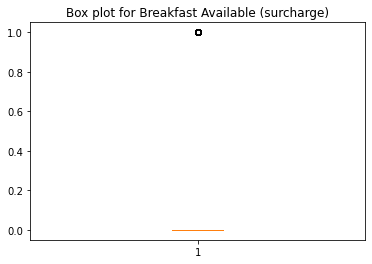

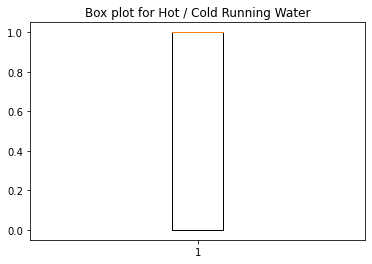

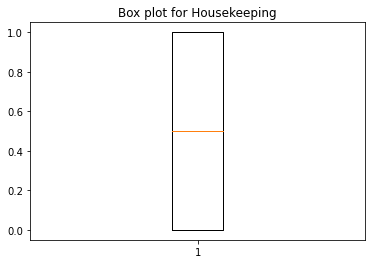

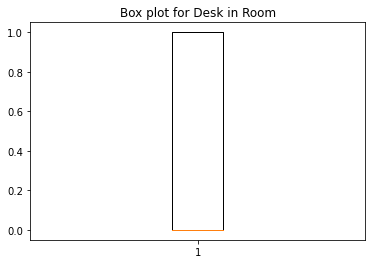

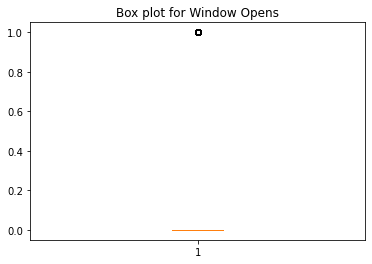

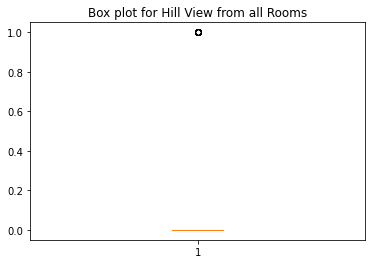

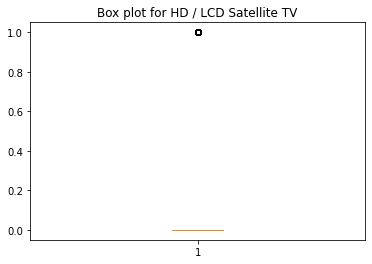

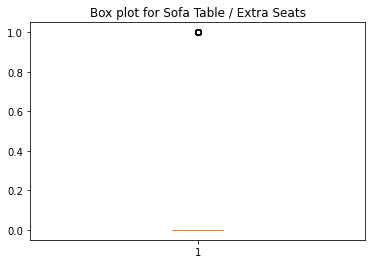

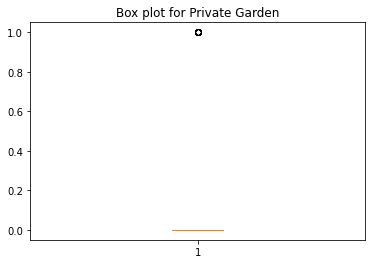

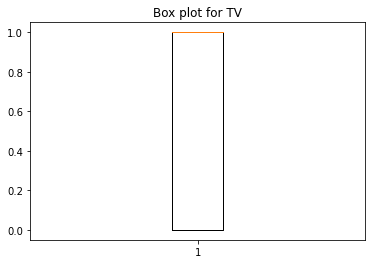

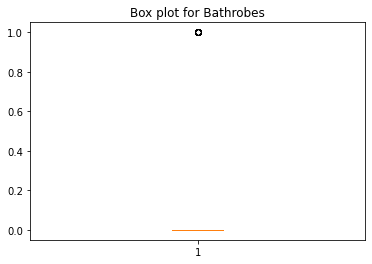

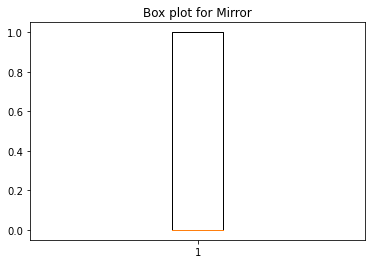

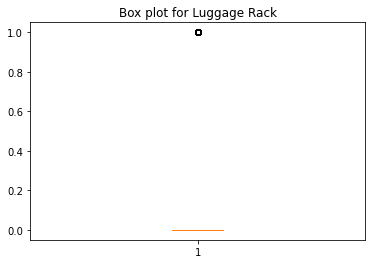

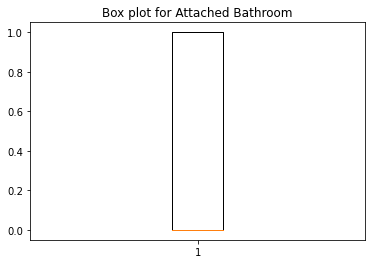

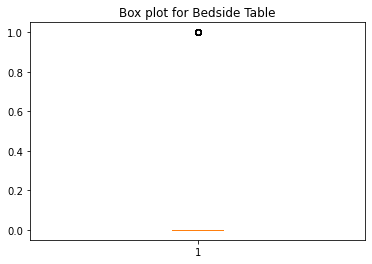

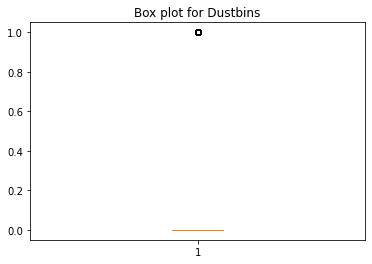

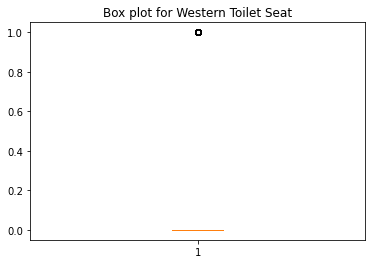

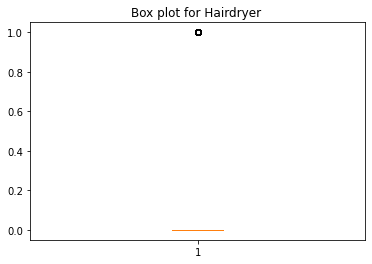

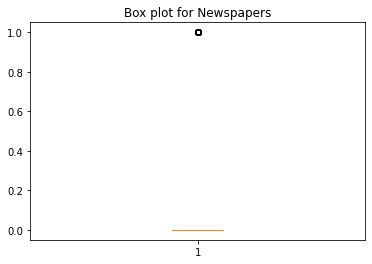

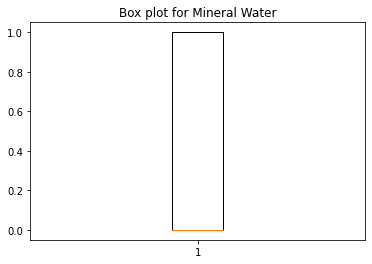

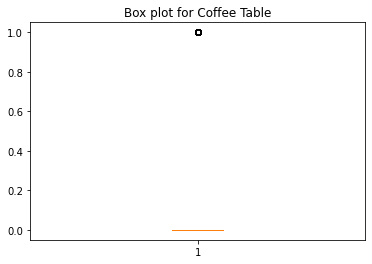

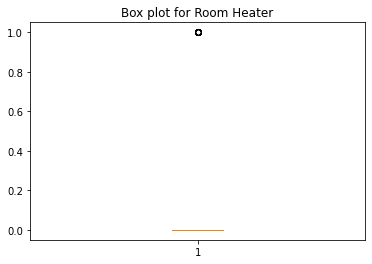

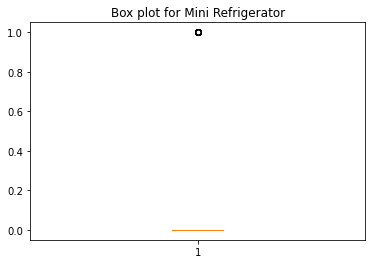

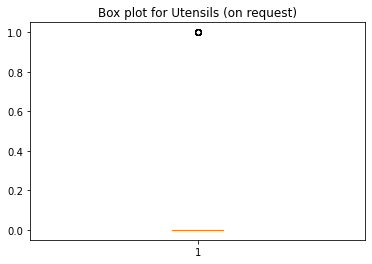

In [11]:
import matplotlib.pyplot as plt

# Plot box plot for each column in separate figure
for column in df.columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [12]:
# Identify outliers using z-score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove rows with outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

df = df_no_outliers

In [13]:
# Split the data into independent and dependent variables
X = df.drop('root.page.record.room_type.room_type_name', axis=1)
y = df['root.page.record.room_type.room_type_name']

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [17]:
# Find and print the training and testing accuracy
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)
print(f'Training accuracy: {train_accuracy:.2f}')
print(f'Testing accuracy: {test_accuracy:.2f}')

Training accuracy: 0.89
Testing accuracy: 0.89


In [18]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R^2 (coefficient of determination) regression score function.
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 235.0222865079365
R^2: 0.8866468386275228
Mean Absolute Error: 12.651190476190475


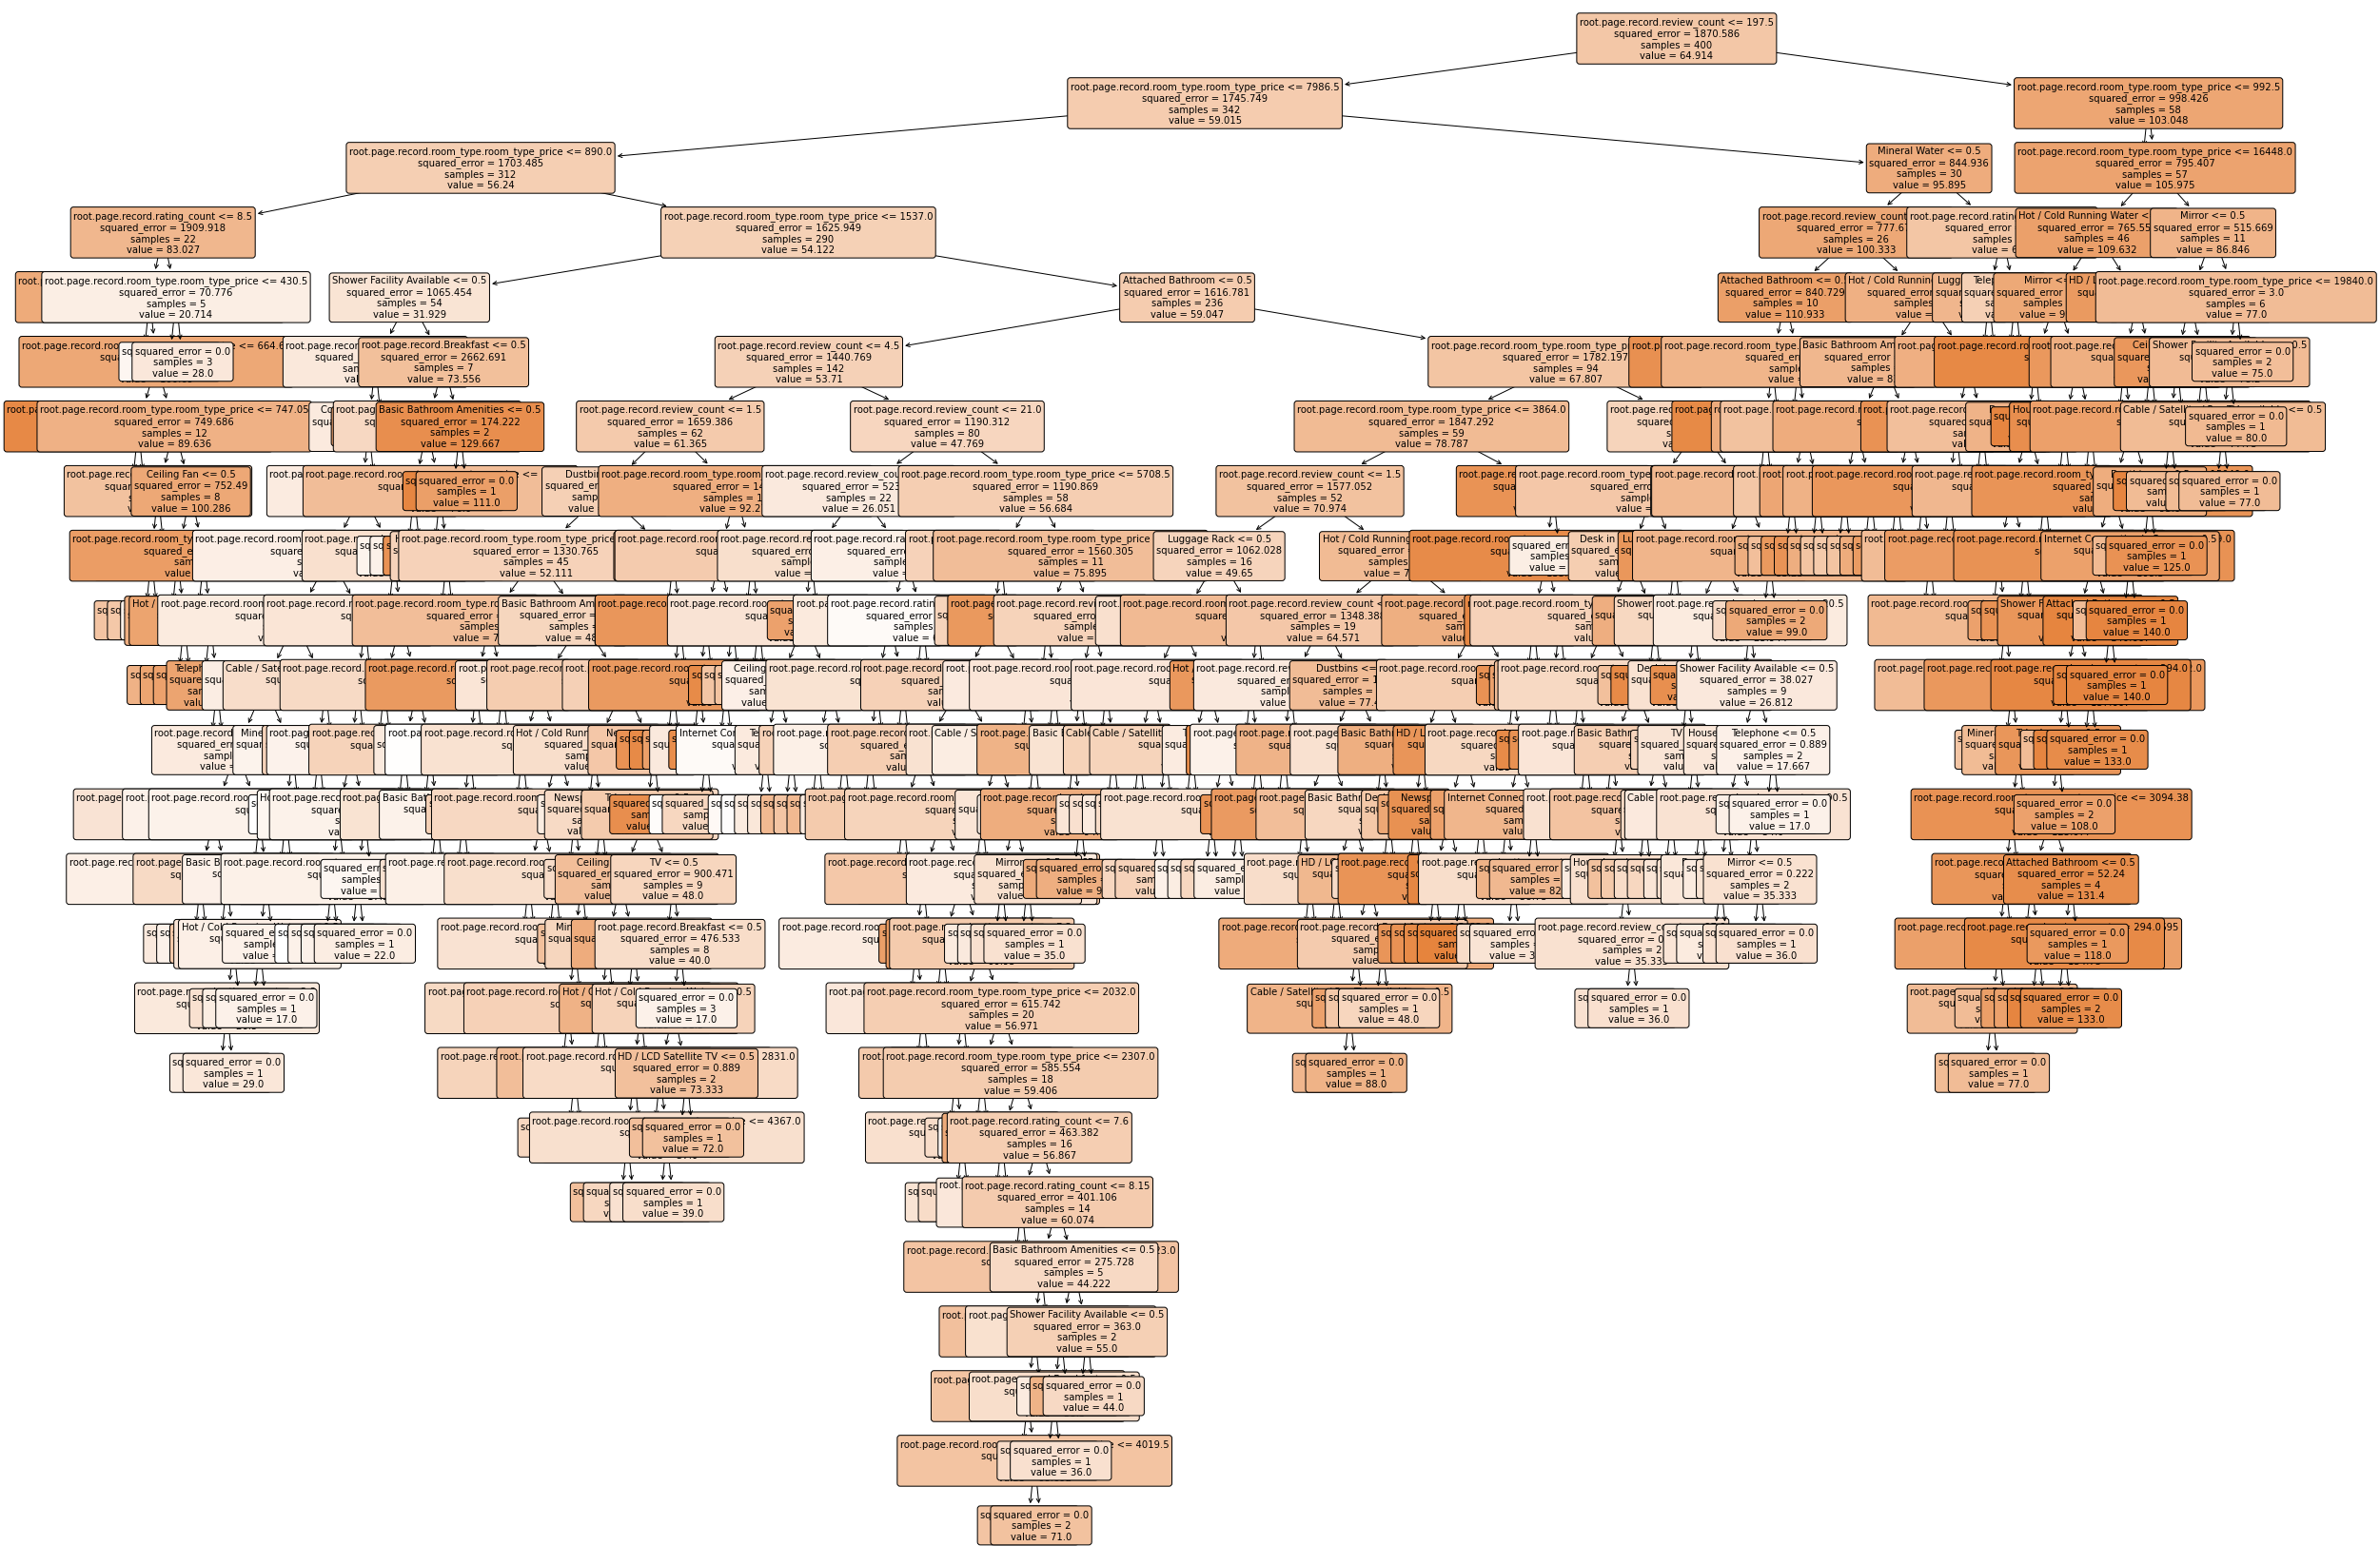

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select a single tree from the random forest
single_tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(40, 30))
plot_tree(single_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# Decoding the encoded categorical data

In [20]:
# Decode the categorical codes
df['root.page.record.room_type.room_type_name'] = label_encoder.inverse_transform(df['root.page.record.room_type.room_type_name'])

# Print the original and decoded columns
print(df[['root.page.record.room_type.room_type_name']])

    root.page.record.room_type.room_type_name
2                         Classic Triple Room
5                   Triple Room with Bathroom
6                   Triple Room with Bathroom
7                   Triple Room with Bathroom
8                       Executive Triple Room
..                                        ...
973           Comfort Triple Room with Shower
974           Comfort Triple Room with Shower
975                      Standard Double Room
976                               Deluxe Room
977                       Classic Triple Room

[627 rows x 1 columns]


# User inputs

In [35]:
# Take inputs from users
Review_count = float(input("Enter Review count: "))
Rating = float(input("Enter rating: "))
Price = float(input("Enter Price: "))
Breakfast = int(input("Enter breakfast (0 or 1): "))
Basic_Bathroom_Amenities = int(input("Enter Basic Bathroom Amenities(0 or 1): "))
TV = int(input("Enter TV (0 or 1): "))
Ceiling_Fan = int(input("Enter Ceiling Fan (0 or 1): "))
Heating_Facility = int(input("Enter Heating Facility (0 or 1): "))
Internet = int(input("Enter internet (0 or 1): "))
Telephone = int(input("Enter Telephone (0 or 1): "))
Shower = int(input("Enter Shower (0 or 1): "))
Breakfast = int(input("Enter Breakfast (0 or 1): "))
water = int(input("Enter Hot / Cold water (0 or 1): "))
Housekeeping = int(input("Enter Housekeeping (0 or 1): "))
Garden = int(input("Enter garden (0 or 1): "))
Desk = int(input("Enter Desk in Room (0 or 1): "))
Window_Opens = int(input("Enter Window Opens (0 or 1): "))
Hill_View = int(input("Enter Hill View (0 or 1): "))
LCD = int(input("Enter LCD (0 or 1): "))
Sofa = int(input("Enter Sofa (0 or 1): "))
TV_normal = int(input("Enter normal tv (0 or 1): "))
Bathrobes = int(input("Enter Bathrobes (0 or 1): "))
Mirror = int(input("Enter Mirror (0 or 1): "))
Luggage_Rack = int(input("Enter Luggage Rack (0 or 1): "))
Attached_Bathroom = int(input("Enter Attached Bathroom (0 or 1): "))
Bedside_Table = int(input("Enter Bedside Table (0 or 1): "))
Dustbins = int(input("Enter Dustbins (0 or 1): "))
Toilets = int(input("Enter Western Toilet Seat (0 or 1): "))
Hairdryer = int(input("Enter Hairdryer (0 or 1): "))
Newspapers = int(input("Enter Newspapers (0 or 1): "))
Mineral_Water = int(input("Enter Mineral Water (0 or 1): "))
Coffee_Table = int(input("Enter Coffee Table (0 or 1): "))
Room_Heater = int(input("Enter Room Heater (0 or 1): "))
Mini_Refrigerator = int(input("Enter Mini Refrigerator (0 or 1): "))
Utensils = int(input("Enter Utensils (0 or 1): "))


Enter Review count: 3
Enter rating: 8
Enter Price: 2000
Enter breakfast (0 or 1): 1
Enter Basic Bathroom Amenities(0 or 1): 1
Enter TV (0 or 1): 1
Enter Ceiling Fan (0 or 1): 1
Enter Heating Facility (0 or 1): 0
Enter internet (0 or 1): 1
Enter Telephone (0 or 1): 0
Enter Shower (0 or 1): 1
Enter Breakfast (0 or 1): 1
Enter Hot / Cold water (0 or 1): 0
Enter Housekeeping (0 or 1): 1
Enter garden (0 or 1): 0
Enter Desk in Room (0 or 1): 0
Enter Window Opens (0 or 1): 1
Enter Hill View (0 or 1): 1
Enter LCD (0 or 1): 1
Enter Sofa (0 or 1): 1
Enter normal tv (0 or 1): 0
Enter Bathrobes (0 or 1): 0
Enter Mirror (0 or 1): 1
Enter Luggage Rack (0 or 1): 0
Enter Attached Bathroom (0 or 1): 1
Enter Bedside Table (0 or 1): 0
Enter Dustbins (0 or 1): 1
Enter Western Toilet Seat (0 or 1): 0
Enter Hairdryer (0 or 1): 0
Enter Newspapers (0 or 1): 0
Enter Mineral Water (0 or 1): 1
Enter Coffee Table (0 or 1): 0
Enter Room Heater (0 or 1): 0
Enter Mini Refrigerator (0 or 1): 1
Enter Utensils (0 or 1)

In [41]:
import numpy as np

input_data = np.vstack((Review_count, Rating, Price, Breakfast, Basic_Bathroom_Amenities, Garden,TV, Ceiling_Fan, Heating_Facility, Internet, Telephone, Shower, Breakfast, water, Housekeeping, Desk, Window_Opens, Hill_View, LCD, Sofa, TV_normal, Bathrobes, Mirror, Luggage_Rack, Attached_Bathroom, Bedside_Table, Dustbins, Toilets, Hairdryer, Newspapers, Mineral_Water, Coffee_Table, Room_Heater, Mini_Refrigerator, Utensils))

In [42]:
input_data = input_data.reshape(1, -1)

In [55]:
# Predict the Room type
predicted_prices = rf.predict(input_data)  # shape: (n,)
print("Room types should be:", predicted_prices)

Room types should be: [64.42]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [59]:
rounded_prices = np.round(predicted_prices).astype(int)  # round off to nearest integer and convert to int
decoded_prices = label_encoder.inverse_transform(rounded_prices)  # decode using label encoder
print("Room types should be:", decoded_prices)  # print the decoded values

Room types should be: ['Executive Triple Room']
